<a href="https://colab.research.google.com/github/yudhiesh1997/Optimisation-Deep-Learning/blob/master/NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd 

In [3]:
path = "/content/yield.csv"
df = pd.read_csv(path)

In [4]:
df.head(10)

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [5]:
X = df["Temp"]
y = df["Yield"]

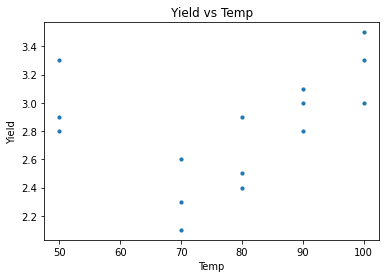

In [10]:
plt.scatter(X,y, s=10)
plt.xlabel("Temp")
plt.ylabel("Yield")
plt.title("Yield vs Temp")
plt.show()

In [11]:
X = X.values.reshape(-1,1)

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(X)

In [13]:
lin_reg = LinearRegression(normalize=True, n_jobs=-1)

lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [16]:
print(f'Coefficients {lin_reg.coef_}')
print(f'Intercept {lin_reg.intercept_}')
y_pred = lin_reg.predict(x_poly)
print(f'MSE : {mean_squared_error(y_pred, y)}')
print(f'R2 score : {r2_score(y, y_pred)}')

Coefficients [-0.15371134  0.0010756 ]
Intercept 7.9604810996563495
MSE : 0.04778465063001155
R2 score : 0.6732052768464256


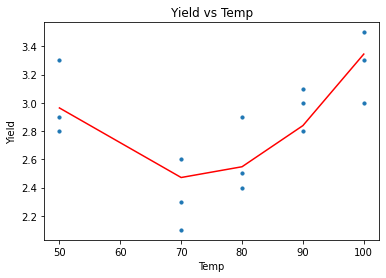

In [17]:
plt.scatter(X,y, s=10)
plt.plot(X, lin_reg.predict(x_poly), color="r")
plt.xlabel("Temp")
plt.ylabel("Yield")
plt.title("Yield vs Temp")
plt.show()

In [68]:
from sklearn import datasets

In [69]:
diabetes = datasets.load_diabetes()


In [70]:
lin_reg2 = LinearRegression(normalize=True)
lin_reg2.fit(diabetes.data, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [71]:
print(f'Coefficients {lin_reg2.coef_}')
print(f'Intercept {lin_reg2.intercept_}')
y_pred2 = lin_reg2.predict(diabetes.data)
print(f'MSE : {mean_squared_error(y_pred2, diabetes.target)}')
print(f'R2 score : {r2_score(diabetes.target, y_pred2)}')

Coefficients [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Intercept 152.1334841628965
MSE : 2859.6903987680653
R2 score : 0.5177494254132935


In [72]:
x = poly_features.fit_transform(diabetes.data)

In [73]:
lin_reg3 = LinearRegression(normalize=True)
lin_reg3.fit(x, diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
print(f'Coefficients {lin_reg3.coef_}')
print(f'Intercept {lin_reg3.intercept_}')
y_pred3 = lin_reg3.predict(x)
print(f'MSE : {mean_squared_error(y_pred3, diabetes.target)}')
print(f'R2 score : {r2_score(diabetes.target, y_pred3)}')

Coefficients [ 5.07214108e+01 -3.74026398e+12  4.60686735e+02  3.42947470e+02
 -3.59955138e+03  3.02830052e+03  1.10308258e+03  7.50180563e+01
  1.82815631e+03  6.28093794e+01  1.23766284e+03  3.17928353e+03
 -3.79393219e+02  4.15707934e+02 -3.25507472e+03 -1.41260174e+03
  4.87087376e+03  4.00058013e+03  2.62805954e+03  1.39939767e+03
  6.19404651e+14  1.37046662e+03  1.93017383e+03  9.07156621e+03
 -7.45536414e+03 -2.86212714e+03 -2.90549221e+03 -2.52731772e+03
  9.85124358e+02  6.68355648e+02  3.06254998e+03 -6.57881416e+03
  5.32023232e+03  2.73034326e+03 -7.32286068e+02  2.52838947e+03
  4.87125629e+02 -1.47872814e+02  1.03278156e+04 -7.12376902e+03
 -3.85437699e+03 -1.26080144e+03 -3.47049006e+03 -2.71055497e+03
  9.41632597e+04 -1.30895055e+05 -8.68560898e+04 -3.82840087e+04
 -7.96672145e+04 -3.90504765e+03  4.68878110e+04  5.72287293e+04
  1.89590072e+04  6.10763749e+04  1.83469679e+03  2.11734044e+04
  2.23183990e+04  3.31640971e+04  4.89336281e+03  1.04374155e+04
  7.58001225

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(diabetes.data, diabetes.target)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
print(f'Coefficients {lasso.coef_}')
print(f'Intercept {lasso.intercept_}')
y_pred4 = lasso.predict(diabetes.data)
print(f'MSE : {mean_squared_error(y_pred4, diabetes.target)}')
print(f'R2 score : {r2_score(diabetes.target, y_pred4)}')

Coefficients [  -0.         -155.36288234  517.18201661  275.08235083  -52.54026923
   -0.         -210.15975349    0.          483.91440913   33.67282148]
Intercept 152.13348416289642
MSE : 2912.5217951175455
R2 score : 0.5088400794027146


In [80]:
from sklearn.svm import SVR

In [81]:
svr = SVR(epsilon=0.2)
svr.fit(diabetes.data, diabetes.target)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [82]:
y_pred_svr = svr.predict(diabetes.data)
print(f'MSE : {mean_squared_error(y_pred_svr, diabetes.target)}')
print(f'R2 score : {r2_score(diabetes.target, y_pred_svr)}')

MSE : 4700.555124426982
R2 score : 0.20731089959670423


## Conclusion: Transforming the data to a polynomial helps in reducing the MSE 